What are the most extreme game outcomes?

How does the game affect television viewership?

How have viewership, TV ratings, and ad cost evolved over time?

Who are the most prolific musicians in terms of halftime show performances?



In [1]:
#Load CSVs
import pandas as pd 
super_bowls = pd.read_csv('super_bowls.csv')
tv = pd.read_csv('tv.csv')
halftime_muscians = pd.read_csv('halftime_musicians.csv')


In [2]:
display(super_bowls.head())
display(tv.head())
display(halftime_muscians.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


## 2. Taking Note of Dataset Issues

In [3]:
# 
# Summary of the TV data to inspect
tv.info()

print('\n') # Linebreak 

# Summary of the halftime musician data to inspect
halftime_muscians.info()

print('\n')

#Summary of halftime_muscians
super_bowls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
super_bowl          53 non-null int64
network             53 non-null object
avg_us_viewers      53 non-null int64
total_us_viewers    15 non-null float64
rating_household    53 non-null float64
share_household     53 non-null int64
rating_18_49        15 non-null float64
share_18_49         6 non-null float64
ad_cost             53 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 3.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
super_bowl    134 non-null int64
musician      134 non-null object
num_songs     88 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
date              52 non-null object
super_bowl        52 non-null int64
venue             52 non-null object
ci

In [4]:
display(tv.isnull().sum())
display(tv.isnull().sum().sum())


super_bowl           0
network              0
avg_us_viewers       0
total_us_viewers    38
rating_household     0
share_household      0
rating_18_49        38
share_18_49         47
ad_cost              0
dtype: int64

123

In [5]:
display(halftime_muscians.isnull().sum())
display(halftime_muscians.isnull().sum().sum())


super_bowl     0
musician       0
num_songs     46
dtype: int64

46

## 3. Combined points distribution

Text(0, 0.5, 'Number of Super Bowl')

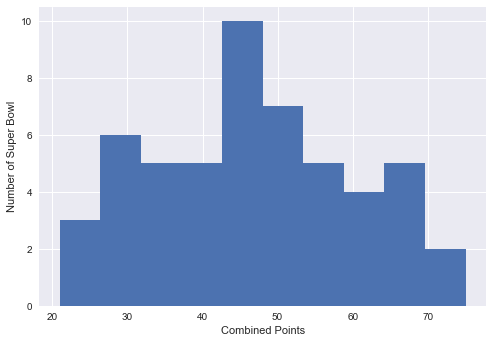

In [6]:
from matplotlib import pyplot as plt 
%matplotlib inline 
plt.style.use('seaborn')

plt.hist(super_bowls['combined_pts'])
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowl')


In [7]:
# Display the Super Bowls with the highest and lowest combined scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


##  4. Point difference distribution

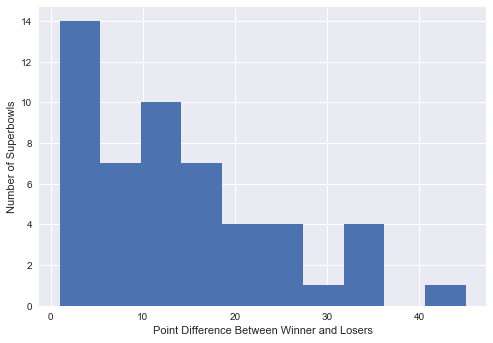

In [8]:
plt.hist(super_bowls['difference_pts'])
plt.xlabel('Point Difference Between Winner and Losers')
plt.ylabel('Number of Superbowls')
plt.show()

In [9]:
close_win = super_bowls[super_bowls['difference_pts'] == 1]
large_win = super_bowls[super_bowls['difference_pts'] >= 30]

display(close_win)
print('\n')
display(large_win)

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
30,1988-01-31,22,Jack Murphy Stadium,San Diego,California,73302,Washington Redskins,42,Doug Williams,NaN,Joe Gibbs,Denver Broncos,10,John Elway,NaN,Dan Reeves,52,32
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


## 5. Do blowouts translate to lost viewers?

Notes: 
<br>
The linear regression and fit shows that while there is a decrease in household share as the differences in points increases, it does not show a fit. 
<br> 
<br>
<b>Things to investigate:</b>
<ul>
    <li>r value of linear regression slope</li>
    <li>standard deviation</li>
    <li>correlation coefficent</li>
    <li>how much it fits</li>
    <li>Confidence Interval</li>

Analysis Notes: 
The closer the difference in points, the likelihood that a large percentage of viewers are likely to see the game to the end

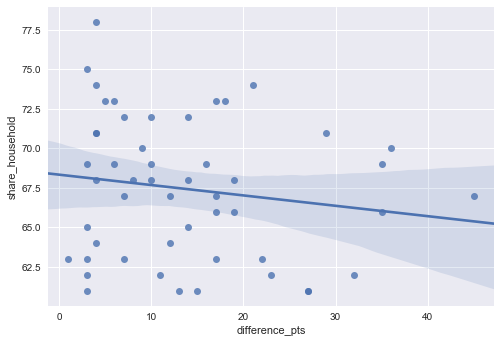

In [44]:
filter1 = tv[tv['super_bowl'] > 1]
games_tv = pd.merge(filter1, super_bowls, on='super_bowl')

#games_tv set determines the sns.regplot

#import seaborn
import seaborn as sns

#create scatter splot with linear regression model fit
sns.regplot(x='difference_pts', y='share_household', data = games_tv)

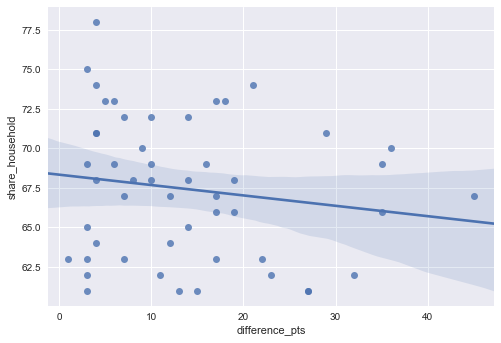

In [42]:
sns.regplot(x='difference_pts', y='share_household', data = games_tv)

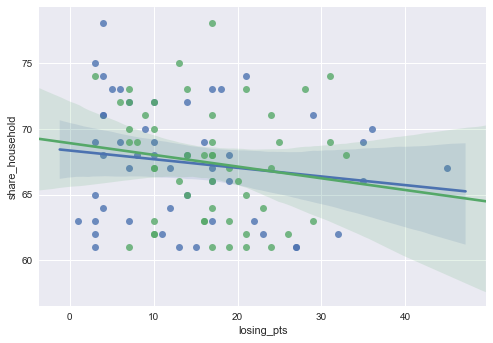

In [43]:
#create scatter splot with linear regression model fit
sns.regplot(x='difference_pts', y='share_household', data = games_tv)

#scatterplot of losing points vs. share household
sns.regplot(x='losing_pts', y='share_household', data = games_tv)

## Question: Does in person attendance increase with viewership?

### Attendance Distribution by Superbowl

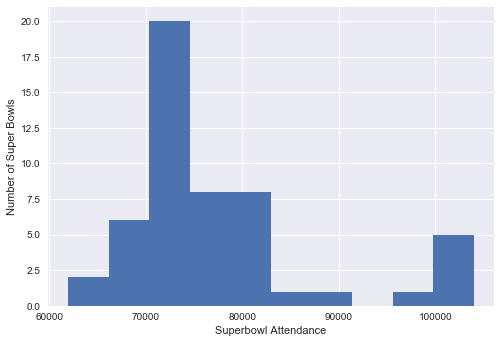

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

plt.hist(super_bowls['attendance'], bins = 10)
plt.xlabel('Superbowl Attendance')
plt.ylabel('Number of Super Bowls')
plt.show()

In [12]:
super_bowls['attendance'].describe()

count        52.000000
mean      77455.942308
std       10373.651925
min       61946.000000
25%       71419.000000
50%       74083.000000
75%       80280.750000
max      103985.000000
Name: attendance, dtype: float64

In [13]:
upr = super_bowls[super_bowls['attendance']< 71419] #lower 25% range 
lwr = super_bowls[super_bowls['attendance']> 80280] #upper 25% range
display(upr.sort_values('attendance', ascending = False))
print('\n')
display(lwr.sort_values('attendance', ascending = False))

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
10,2008-02-03,42,University of Phoenix Stadium,Glendale,Arizona,71101,New York Giants,17,Eli Manning,NaN,Tom Coughlin,New England Patriots,14,Tom Brady,NaN,Bill Belichick,31,3
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
5,2013-02-03,47,Mercedes-Benz Superdome,New Orleans,Louisiana,71024,Baltimore Ravens,34,Joe Flacco,NaN,John Harbaugh,San Francisco 49ers,31,Colin Kaepernick,NaN,Jim Harbaugh,65,3
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
9,2009-02-01,43,Raymond James Stadium,Tampa,Florida,70774,Pittsburgh Steelers,27,Ben Roethlisberger,NaN,Mike Tomlin,Arizona Cardinals,23,Kurt Warner,NaN,Ken Whisenhunt,50,4
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
20,1998-01-25,32,Qualcomm Stadium,San Diego,California,68912,Denver Broncos,31,John Elway,NaN,Mike Shanahan,Green Bay Packers,24,Brett Favre,NaN,Mike Holmgren,55,7
6,2012-02-05,46,Lucas Oil Stadium,Indianapolis,Indiana,68658,New York Giants,21,Eli Manning,NaN,Tom Coughlin,New England Patriots,17,Tom Brady,NaN,Bill Belichick,38,4
12,2006-02-05,40,Ford Field,Detroit,Michigan,68206,Pittsburgh Steelers,21,Ben Roethlisberger,NaN,Bill Cowher,Seattle Seahawks,10,Matt Hasselbeck,NaN,Mike Holmgren,31,11
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
38,1980-01-20,14,Rose Bowl,Pasadena,California,103985,Pittsburgh Steelers,31,Terry Bradshaw,NaN,Chuck Noll,Los Angeles Rams,19,Vince Ferragamo,NaN,Ray Malavasi,50,12
35,1983-01-30,17,Rose Bowl,Pasadena,California,103667,Washington Redskins,27,Joe Theismann,NaN,Joe Gibbs,Miami Dolphins,17,David Woodley,NaN,Don Shula,44,10
41,1977-01-09,11,Rose Bowl,Pasadena,California,103438,Oakland Raiders,32,Kenny Stabler,NaN,John Madden,Minnesota Vikings,14,Fran Tarkenton,NaN,Bud Grant,46,18
7,2011-02-06,45,Cowboys Stadium,Arlington,Texas,103219,Green Bay Packers,31,Aaron Rodgers,NaN,Mike McCarthy,Pittsburgh Steelers,25,Ben Roethlisberger,NaN,Mike Tomlin,56,6
31,1987-01-25,21,Rose Bowl,Pasadena,California,101063,New York Giants,39,Phil Simms,NaN,Bill Parcells,Denver Broncos,20,John Elway,NaN,Dan Reeves,59,19
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
33,1985-01-20,19,Stanford Stadium,Palo Alto,California,84059,San Francisco 49ers,38,Joe Montano,NaN,Bill Walsh,Miami Dolphins,16,Dan Marino,NaN,Don Shula,54,22
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
36,1982-01-24,16,Pontiac Silverdome,Pontiac,Michigan,81270,San Francisco 49ers,26,Joe Montana,NaN,Bill Walsh,Cincinnati Bengals,21,Ken Anderson,NaN,Forrest Gregg,47,5


## Viewership Distribution by Super Bowl

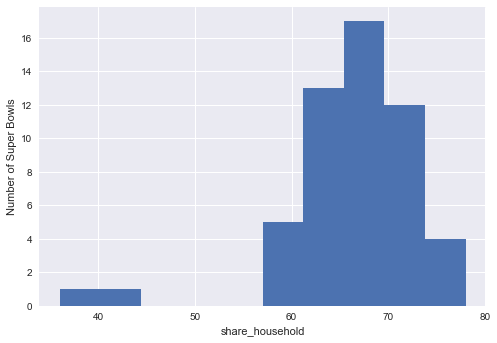

In [14]:
plt.style.use('seaborn')

#plot histogram of viewership using share of household
plt.hist(tv['share_household'])
plt.xlabel('share_household')
plt.ylabel('Number of Super Bowls')
plt.show()

In [15]:
tv['share_household'].describe()

count    53.000000
mean     66.377358
std       6.931607
min      36.000000
25%      63.000000
50%      67.000000
75%      71.000000
max      78.000000
Name: share_household, dtype: float64

In [16]:
tv[tv['super_bowl'] > 1]['share_household'].describe()

count    51.000000
mean     67.431373
std       4.410238
min      61.000000
25%      63.000000
50%      68.000000
75%      71.000000
max      78.000000
Name: share_household, dtype: float64

In [17]:
tv_lwr = tv[tv['share_household']<63]
tv_upr = tv[tv['share_household']>75]
display(tv_lwr)
display(tv_upr)

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
12,40,ABC,90745000,141400000.0,41.6,62,NaN,NaN,2500000
13,39,Fox,86072000,NaN,41.1,62,NaN,NaN,2400000
15,37,ABC,88637000,138500000.0,40.7,61,NaN,NaN,2200000
16,36,Fox,86801000,NaN,40.4,61,NaN,NaN,2200000
17,35,CBS,84335000,NaN,40.4,61,NaN,NaN,2200000
19,33,Fox,83720000,NaN,40.2,61,36.4,NaN,1600000
23,29,ABC,83420000,NaN,41.3,62,NaN,NaN,1150000
26,26,CBS,79590000,NaN,40.3,61,NaN,NaN,850000
30,22,ABC,80140000,NaN,41.9,62,NaN,NaN,645000
51,1,CBS,26750000,51180000.0,22.6,43,NaN,NaN,42500


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
42,10,CBS,57710000,NaN,42.3,78,NaN,NaN,110000


### Linear Regression

Text(0, 0.5, 'Household Share')

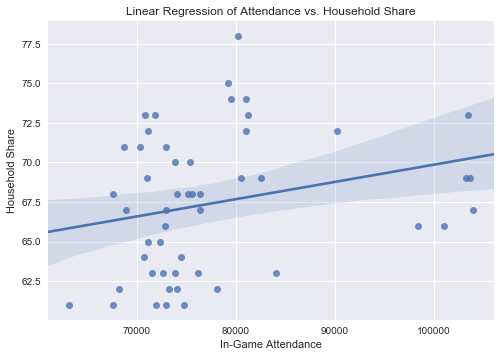

In [18]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')

# Import seaborn
import seaborn as sns

# Create a scatter plot with a linear regression model fit
sns.regplot(x='attendance', y='share_household', data=games_tv)

plt.title('Linear Regression of Attendance vs. Household Share')
# Set x-axis label
plt.xlabel('In-Game Attendance')
# Set y-axis label
plt.ylabel('Household Share')


# States with highest attendance  and States with lowest attendance in person????

In [29]:

super_bowls.groupby('state')['attendance'].sum().sort_values(ascending=False)

state
Florida       1129973
California    1027619
Louisiana      758101
Texas          317433
Arizona        217736
Michigan       149476
Georgia        145442
Minnesota      130742
New Jersey      82529
Indiana         68658
Name: attendance, dtype: int64

In [31]:
super_bowls.groupby('city')['attendance'].sum().sort_values(ascending=False)

city
New Orleans        758101
Pasadena           510527
Miami              389810
Miami Gardens      372610
Tampa              289428
Houston            214214
San Diego          209817
Los Angeles        152128
Atlanta            145442
Glendale           141389
Minneapolis        130742
Arlington          103219
Palo Alto           84059
East Rutherford     82529
Pontiac             81270
Jacksonville        78125
Tempe               76347
Santa Clara         71088
Indianapolis        68658
Detroit             68206
Name: attendance, dtype: int64

In [35]:
df_new = super_bowls[super_bowls['state']=='Florida']
df_new

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
8,2010-02-07,44,Sun Life Stadium,Miami Gardens,Florida,74059,New Orleans Saints,31,Drew Brees,NaN,Sean Payton,Indianapolis Colts,17,Peyton Manning,NaN,Jim Caldwell,48,14
9,2009-02-01,43,Raymond James Stadium,Tampa,Florida,70774,Pittsburgh Steelers,27,Ben Roethlisberger,NaN,Mike Tomlin,Arizona Cardinals,23,Kurt Warner,NaN,Ken Whisenhunt,50,4
11,2007-02-04,41,Dolphin Stadium,Miami Gardens,Florida,74512,Indianapolis Colts,29,Peyton Manning,NaN,Tony Dungy,Chicago Bears,17,Rex Grossman,NaN,Lovie Smith,46,12
13,2005-02-06,39,Alltel Stadium,Jacksonville,Florida,78125,New England Patriots,24,Tom Brady,NaN,Bill Belichick,Philadelphia Eagles,21,Donovan McNabb,NaN,Andy Reid,45,3
17,2001-01-28,35,Raymond James Stadium,Tampa,Florida,71921,Baltimore Ravens,34,Trent Dilfer,NaN,Brian Billick,New York Giants,7,Kerry Collins,NaN,Jim Fassel,41,27
19,1999-01-31,33,Pro Player Stadium,Miami Gardens,Florida,74803,Denver Broncos,34,John Elway,NaN,Mike Shanahan,Atlanta Falcons,19,Chris Chandler,NaN,Dan Reeves,53,15
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1
29,1989-01-22,23,Joe Robbie Stadium,Miami Gardens,Florida,75129,San Francisco 49ers,20,Joe Montana,NaN,Bill Walsh,Cincinnati Bengals,16,Boomer Esiason,NaN,Sam Wyche,36,4
34,1984-01-22,18,Tampa Stadium,Tampa,Florida,72920,Los Angeles Raiders,38,Jim Plunkett,NaN,Tom Flores,Washington Redskins,9,Joe Theismann,NaN,Joe Gibbs,47,29


In [40]:
df_new.sort_values(by=['attendance'], ascending = False)

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
42,1976-01-18,10,Orange Bowl,Miami,Florida,80187,Pittsburgh Steelers,21,Terry Bradshaw,NaN,Chuck Noll,Dallas Cowboys,17,Roger Staubach,NaN,Tom Landry,38,4
39,1979-01-21,13,Orange Bowl,Miami,Florida,79484,Pittsburgh Steelers,35,Terry Bradshaw,NaN,Chuck Noll,Dallas Cowboys,31,Roger Staubach,NaN,Tom Landry,66,4
47,1971-01-17,5,Orange Bowl,Miami,Florida,79204,Baltimore Colts,16,Earl Morrall,Johnny Unitas,Don McCafferty,Dallas Cowboys,13,Craig Morton,NaN,Tom Landry,29,3
13,2005-02-06,39,Alltel Stadium,Jacksonville,Florida,78125,New England Patriots,24,Tom Brady,NaN,Bill Belichick,Philadelphia Eagles,21,Donovan McNabb,NaN,Andy Reid,45,3
50,1968-01-14,2,Orange Bowl,Miami,Florida,75546,Green Bay Packers,33,Bart Starr,NaN,Vince Lombardi,Oakland Raiders,14,Daryle Lamonica,NaN,John Rauch,47,19
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9
29,1989-01-22,23,Joe Robbie Stadium,Miami Gardens,Florida,75129,San Francisco 49ers,20,Joe Montana,NaN,Bill Walsh,Cincinnati Bengals,16,Boomer Esiason,NaN,Sam Wyche,36,4
19,1999-01-31,33,Pro Player Stadium,Miami Gardens,Florida,74803,Denver Broncos,34,John Elway,NaN,Mike Shanahan,Atlanta Falcons,19,Chris Chandler,NaN,Dan Reeves,53,15
11,2007-02-04,41,Dolphin Stadium,Miami Gardens,Florida,74512,Indianapolis Colts,29,Peyton Manning,NaN,Tony Dungy,Chicago Bears,17,Rex Grossman,NaN,Lovie Smith,46,12
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


## 

## 6. Viewership and the ad industry over time

The downward sloping regression line and the 95% confidence interval for that regression suggest that bailing on the game if it is a blowout is common. Though it matches our intuition, we must take it with a grain of salt because the linear relationship in the data is weak due to our small sample size of 52 games.

Regardless of the score though, I bet most people stick it out for the halftime show, which is good news for the TV networks and advertisers. A 30-second spot costs a pretty \$5 million now, but has it always been that way? And how have number of viewers and household ratings trended alongside ad cost? 

Lets check profitability.

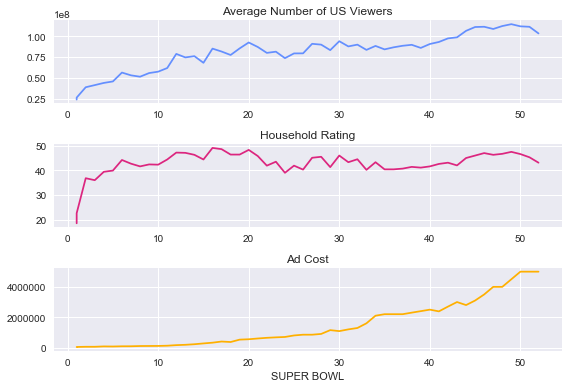

In [21]:
# Create a figure with 3x1 subplot and activate the top subplot
plt.subplot(3, 1, 1)
plt.plot(tv['super_bowl'], tv['avg_us_viewers'], color='#648FFF')
plt.title('Average Number of US Viewers')



# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(tv['super_bowl'], tv['rating_household'], '#DC267F')
plt.title('Household Rating')


# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(tv['super_bowl'], tv['ad_cost'], '#FFB000')
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')


# Improve the spacing between subplots
plt.tight_layout()

Notes: This chart is TERRIBLE. Find a way to make it more easily readable in a few seconds. 

## 7. Halftime shows weren't always this great 

In [22]:
# Display all halftime musicians for Super Bowls up to and including Super Bowl XXVII
halftime_muscians[halftime_muscians['super_bowl'] <= 27]


,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


In [23]:
halftime_muscians[['super_bowl','musician']]

,super_bowl,musician
0,52,Justin Timberlake
1,52,University of Minnesota Marching Band
2,51,Lady Gaga
3,50,Coldplay
4,50,Beyoncé
...,...,...
129,3,Florida A&M University Marching 100 Band
130,2,Grambling State University Tiger Marching Band
131,1,University of Arizona Symphonic Marching Band
132,1,Grambling State University Tiger Marching Band


In [24]:
pd.options.display.max_rows
halftime_muscians[halftime_muscians['super_bowl'] >= 27]

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0
...,...,...,...
76,28,Tanya Tucker,2.0
77,28,Travis Tritt,2.0
78,28,The Judds,1.0
79,28,Wynonna Judd,2.0


## 9. Who performed the most songs in a halftime show?

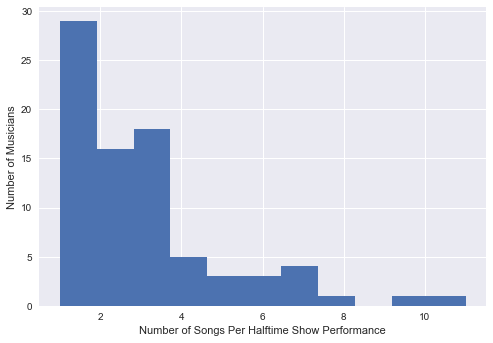

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [25]:
# Filter out most marching bands
no_bands = halftime_muscians[~halftime_muscians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.show()

# Sort the non-band musicians by number of songs per appearance...
no_bands = no_bands.sort_values('num_songs', ascending=False)
# ...and display the top 15
display(no_bands.head(15))